**Step 1--Data Preprocessing**

In [33]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [34]:
#Read the datasets
card=pd.read_csv("D:/Projects/Datasets/creditcard.csv")

In [35]:
#Check the dataset
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
#check if null values is present in dataset or not.
card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
#Checking the dimensions of the dataset
card.shape

(284807, 31)

**Lets check the correlation between each variables**

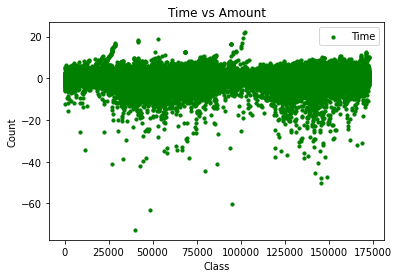

In [69]:
#Plot Time vs Amount.
x1 = card.iloc[:, 0].values
y1 = card.iloc[:, 2].values
plt.scatter(x1,y1,label='Time',color='Green',s=10)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Time vs Amount')
plt.legend()
plt.show()

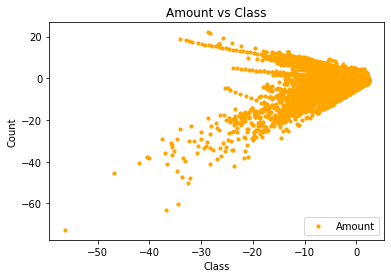

In [70]:
#Plot Amount vs Class.
x2 = card.iloc[:, 1].values
y2 = card.iloc[:, 2].values
plt.scatter(x2,y2,label='Amount',color='Orange',s=10)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Amount vs Class')
plt.legend(loc="lower right")
plt.show()

In [40]:
#separating the dependent and independent values.
#X-Independent variable
X = card.iloc[:, 1:2].values
print(X)

[[-1.35980713]
 [ 1.19185711]
 [-1.35835406]
 ...
 [ 1.91956501]
 [-0.24044005]
 [-0.53341252]]


In [41]:
#y-dependent or target variable
y = card.iloc[:, 2].values
print(y)

[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]


**Step 2-Splitting the dataset into training and testing set**

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Step 3-Build a linear model**

In [43]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#predicting the test set
y_pred = regressor.predict(X_test)

**Step 4-Now fun part**

---Visualize the result.

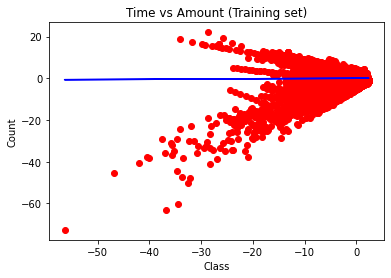

In [68]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Time vs Amount (Training set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

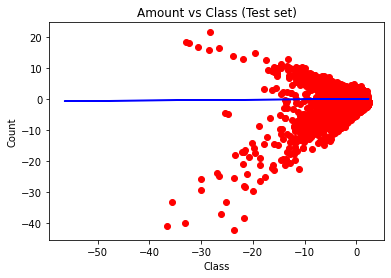

In [71]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'Red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Amount vs Class (Test set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Step 5-Checking the accuracy**


In [46]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Coefficients:  [0.01225033]
Mean squared error: 2.66
Variance score: -0.00
